# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [6]:
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale used to calculate GRE (130-170) is larger than the scale of GPA (0-4.0) and thus creates both a larger range and mean value for GRE. 

#### Question 4. Drop data points with missing data


In [7]:
df = df_raw.dropna() 
print df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Using count () shows the total values across all 4 categories and the datatype indicates an integer and thus there are no null values. 

#### Question 6. Create box plots for GRE and GPA

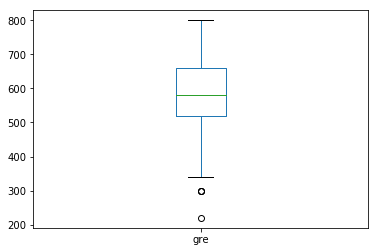

In [11]:
df['gre'].plot(kind='box')

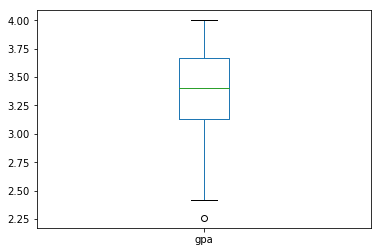

In [12]:
df['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

min = minimum value
25% = first quartile (Q1) = median of the lower half of the data
50% = second quartile (Q2) = median of the data
75% = third quartile (Q3) = median of the upper half of the data
max = maximum value
IQR = Q3-Q1
Outliers =
below Q1 - 1.5 * IQR
above Q3 + 1.5 * IQR

In [29]:
df['gpa'].describe()

count    397.000000
mean       3.392242
std        0.380208
min        2.260000
25%        3.130000
50%        3.400000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

In [47]:
df['gre'].describe()

count    397.000000
mean     587.858942
std      115.717787
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

#### Question 8. Describe each distribution 

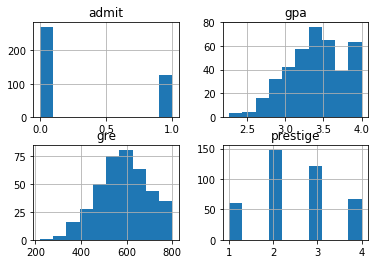

In [21]:
# plot the distribution of each variable 
df.hist()
pl.show()

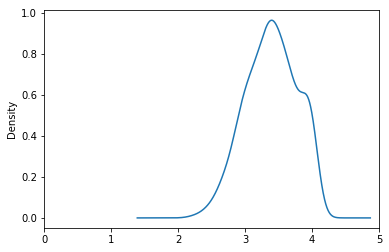

In [38]:
df['gpa'].plot(kind='density', xlim=(0, 5))

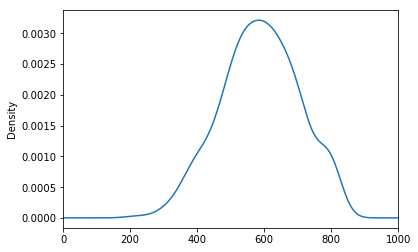

In [45]:
df['gre'].plot(kind='density', xlim=(0, 1000))

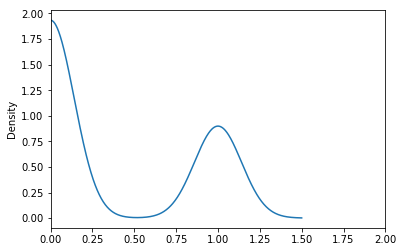

In [40]:
df['admit'].plot(kind='density', xlim=(0, 2))

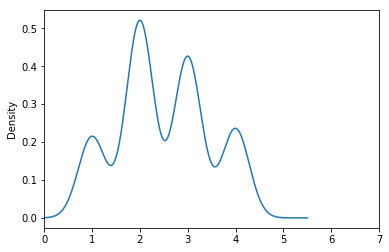

In [42]:
df['prestige'].plot(kind='density', xlim=(0, 7))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Admit and presitge are not continuous variable and thus our not normal. GPA and GRE, though slightly skewed, appear to meet the requirements visually by observing both the histogram and density plots.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: For GRE and GPA, there is no need for correction. 

#### Question 11. Which of our variables are potentially colinear? 

In [46]:
# create a correlation matrix for the data
df.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The correlation matrix does not show a strong correlation between any of the variables indicating that the data most likely is not colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Controlling for gpa and gre, test a model where admit = beta(prestige) + beta

#### Question 14. What is your hypothesis? 

Answer: Students who attended a more prestigious school are more likely to be admitted to graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data